# Customer Satisfaction Ecommerce

O objetivo deste projeto prático é prever a satisfação do cliente a partir de um conjunto de dados de ecommerce do Brasil.

Dados podem ser baixados aqui: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Colunas da tabela:

1. **order_status**: status do pedido (entregue ou cancelado) (delivered or canceled).

2. **order_purchase_timestamp**: timestamp (data/hora) da compra de cada item.

3. **order_delivered_customer_date**: data real de entrega do pedido do cliente.

4. **order_estimated_delievy_date**: data de entrega estimada que foi fornecida ao cliente no momento da compra.

5. **shipping_limit_date**: data limite de envio do vendedor para a transferência do pedido ao parceiro logístico.

6. **payment_sequential**: método de pagamento utilizado pelo consumidor.

7. **payment_type**: método de pagamento preferido do cliente.

8. **payment_installments**: número de parcelas de pagamento preferido do cliente.

9. **payment_value**: valor da transação.

10. **price**: custo de cada item.

11. **freight_value**: custo de transporte para cada item (se um pedido tiver mais de um item, o valor do frete é dividido entre os itens).

12. **product_category**: categoria de cada item.

13. **product_name_length**: número de caracteres extraídos do nome do produto.

14. **product_description_length**: número de caracteres extraídos da descrição do produto.

15. **product_photos_qty**: número de fotos de produtos que foram publicadas.

16. **review_score**: classificação dada por um cliente em uma pesquisa de satisfação que varia de 1 a 5.

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados

Vamos carregar os dados de um diretório do GitHub. Poderíamos também carregar através de um diretório nosso no Google Drive. 
São várias tabelas em csv. Vamos carregar uma por uma.

In [138]:
# definição do caminho dos arquivos para ler os dados
diretorio = 'https://raw.githubusercontent.com/andressaapio/pythontutorials/main/data/olist/' 

In [139]:
# carrega dataset com infos sobre os pedidos: olist_orders_dataset.csv
orders = pd.read_csv(diretorio + 'olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [140]:
# carrega dataset com infos sobre as avaliações dos pedidos: olist_order_reviews_dataset.csv
order_reviews = pd.read_csv(diretorio + 'olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [141]:
# carrega dataset com infos sobre os pedidos: olist_order_payments_dataset.csv
order_payments = pd.read_csv(diretorio + 'olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [142]:
# carrega dataset do consumidor: olist_customers_dataset.csv
customer = pd.read_csv(diretorio + 'olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [143]:
# carrega dataset com os itens dos pedidos: olist_order_items_datase.csv
order_items = pd.read_csv(diretorio + 'olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [144]:
# carrega dataset com infos sobre os produtos: olist_products_dataset.csv
products = pd.read_csv(diretorio + 'olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [145]:
# carrega dataset sobre os vendedores: olist_sellers_dataset.csv
sellers = pd.read_csv(diretorio + 'olist_sellers_dataset.csv')
sellers.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [146]:
# carrega dataset com a tradução dos produtos:  product_category_name_translation
product_translation = pd.read_csv(diretorio + 'product_category_name_translation.csv')
product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Merge dos datasets

Fica difícil trabalhar com várias tabelas, certo? Mas é geralmente assim que acontece no mundo real. O ideal é criarmos uma tabela só com todas as informações que vamos utilizar para a nossa análise. Felizmente temos a função Merge que faz isso para a gente.

### Merge de todos os datasets referentes ao consumidor

In [147]:
# A = olist_orders_dataset.csv, olist_order_reviews_dataset.csv, olist_order_payments_dataset.csv
# em order_id

# customer_df = A e olist_customers_dataset.csv em customer_id

A = pd.merge(orders, order_reviews, on='order_id')
A = pd.merge(A, order_payments,on='order_id')
A = pd.merge(A, customer,on='customer_id')
A.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


### Merge de todos os datasets referentes ao vendedor 

In [148]:
# B = olist_order_items_dataset e olist_products_dataset em product_id
# C = B e olist_sellers_dataset em seller_id
# seller_df = C e product_category_name_translation.csv em product_category_name

B = pd.merge(order_items,products,on='product_id')
B = pd.merge(B,sellers,on='seller_id')
B = pd.merge(B,product_translation,on='product_category_name')
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


### Merge dos datasets do consumidor e do vendedor

In [149]:
# df_ecommerce = merge do customer_df e do seller_df em order_id
df_ecommerce = pd.merge(A, B, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


## Seleção dos dados do dataset

Agora que temos a nossa tabela final, vemos que temos muitas informações (colunas) que não precisamos. Vamos selecionar apenas aquelas que fazem sentido para a nossa análise.

In [150]:
# visualizar as colunas do dataset:
df_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [151]:
# selecionar apenas as colunas: 
# 'order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
# 'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
#  'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
# 'product_photos_qty','review_score'

In [152]:
# Selecionar apenas as colunas importantes
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]

#Fixing typos and column names
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [153]:
df_ecommerce.shape

(115609, 16)

# Limpeza dos dados e pré processamento

Agora precisamos ver se temos valores faltantes na nossa tabela. Além disso, verificar se as informações fazem sentido e estão na forma correta - exemplo: será que vale a pena inserir uma coluna com data e hora na nossa análise? 

## Remover valores nulos (NaN)

In [154]:
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [155]:
df_ecommerce.dropna(how='any',inplace=True)
df_ecommerce.shape

(113209, 16)

## Converter em formato de data

In [156]:
df_ecommerce['order_purchase_timestamp']

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2018-07-24 20:41:37
4         2018-08-08 08:38:49
                 ...         
115604    2018-02-06 12:58:58
115605    2017-08-27 14:46:43
115606    2018-01-08 21:28:27
115607    2018-01-08 21:28:27
115608    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 113209, dtype: object

Não precisamos do horário, apenas da data.

In [157]:
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

In [158]:
df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date

In [159]:
df_ecommerce['shipping_limit_date']

0         2017-10-06
1         2017-10-06
2         2017-10-06
3         2018-07-30
4         2018-08-13
             ...    
115604    2018-02-12
115605    2017-09-05
115606    2018-01-12
115607    2018-01-12
115608    2018-03-15
Name: shipping_limit_date, Length: 113209, dtype: object

Será que faz sentido termos a data de entrega? Não é melhor criarmos colunas com quantos dias demorou para a entrega, quantos dias estimados para entrega, etc?

In [160]:
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [161]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

OK. Conseguimos o que tínhamos em mente. Porém,o resultado é uma string, ou seja, um texto (1 days, 2 days). Precisamos que seja um valor inteiro (1, 2,)  para que nosso algoritmo entenda melhor a nossa análise. Por isso. transformaremos o timedelta em um valor inteiro.

In [162]:
cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [163]:
df_ecommerce['delivery_days']

0          8
1          8
2          8
3         14
4          9
          ..
115604    22
115605    25
115606    17
115607    17
115608     8
Name: delivery_days, Length: 113209, dtype: int64

## Removeremos as colunas que não utilizaremos

Vamos remover as colunas com as datas, uma vez que já extraímos as informações que gostaríamos e elas não serão mais necessárias para a nossa análise.

In [164]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

In [165]:
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5


## Visualização rápida dos dados

Vamos visualizar rapidamente como ficaram os dados da nossa tabela? 

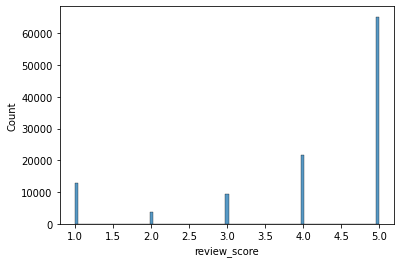

In [166]:
sns.histplot(x='review_score', data=df_ecommerce)

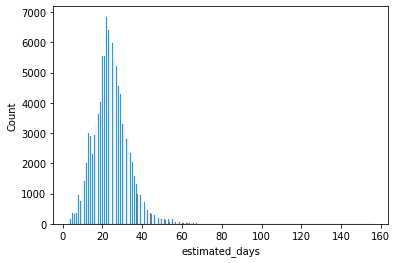

In [167]:
sns.histplot(x='estimated_days', data=df_ecommerce)

(0.0, 2000.0)

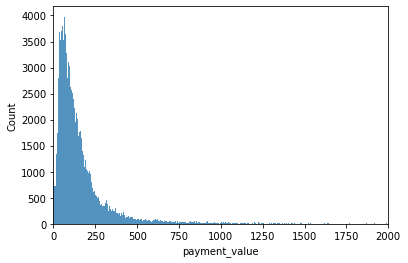

In [168]:
sns.histplot(x='payment_value', data=df_ecommerce)
plt.xlim([0,2000])

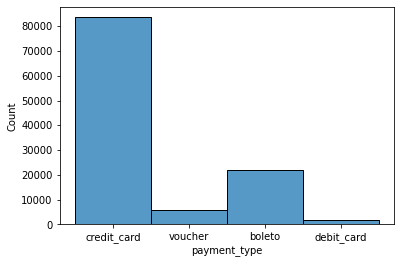

In [169]:
sns.histplot( x='payment_type', data=df_ecommerce)
#plt.xlim([0,2000])

# Exploratory Data Analysis

Vamos iniciar a exploração dos dados para que consigamos entender melhor sobre os negócios e tirar alguns insights.

## Os 10 produtos mais comprados pelos clientes

In [170]:
fig_size = (18,8)
font_size = 16
title_font_size = 20

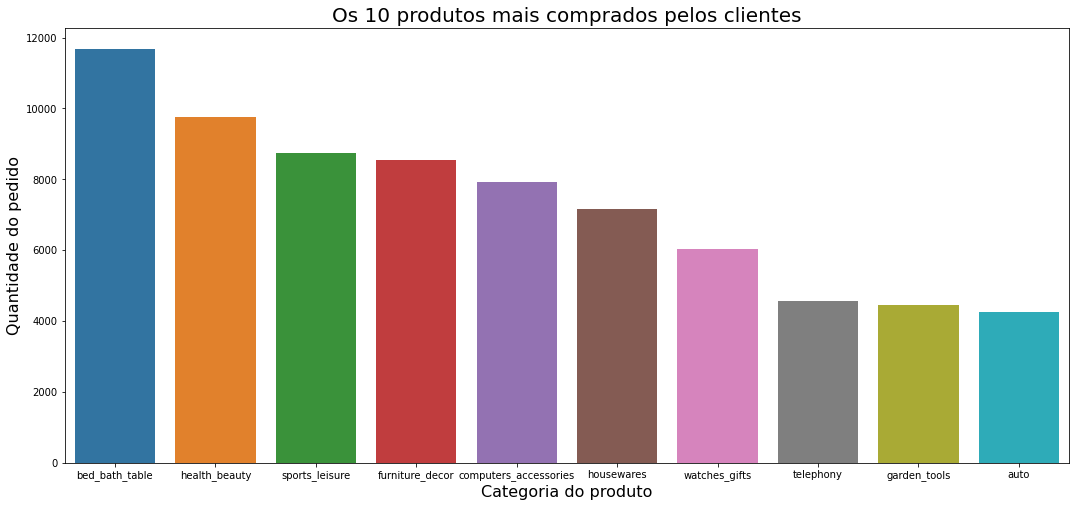

In [171]:
# definição do gráfico de barras
fig = plt.figure(figsize = fig_size)

sns.barplot(x = df_ecommerce.product_category.value_counts().index[:10], 
            y = df_ecommerce.product_category.value_counts()[:10])

# definição dos nomes dos eixos e título
plt.xlabel('Categoria do produto', fontsize = font_size)
plt.ylabel('Quantidade do pedido', fontsize = font_size)
plt.title("Os 10 produtos mais comprados pelos clientes", fontsize = title_font_size)

plt.show()

**Insights sobre o negócio**

* Os principais itens comprados são das  categorias de cama mesa e banho, de saúde e beleza, esporte e lazer, móveis e decoração e acessórios de informática.

* Cama, mesa e banho recebeu mais de 10 mil pedidos!

## Valor de pagamento por cliente com base no tipo de pagamento

In [172]:
def bar_plot_df(x_var, y_var, title):
  # definição do gráfico de barras
  fig = plt.figure(figsize = fig_size)
  sns.barplot(x = x_var, 
              y = y_var, data=df_ecommerce)
  
  # definição dos nomes dos eixos e título
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)
  plt.title(title, fontsize = title_font_size)
  
  plt.show()

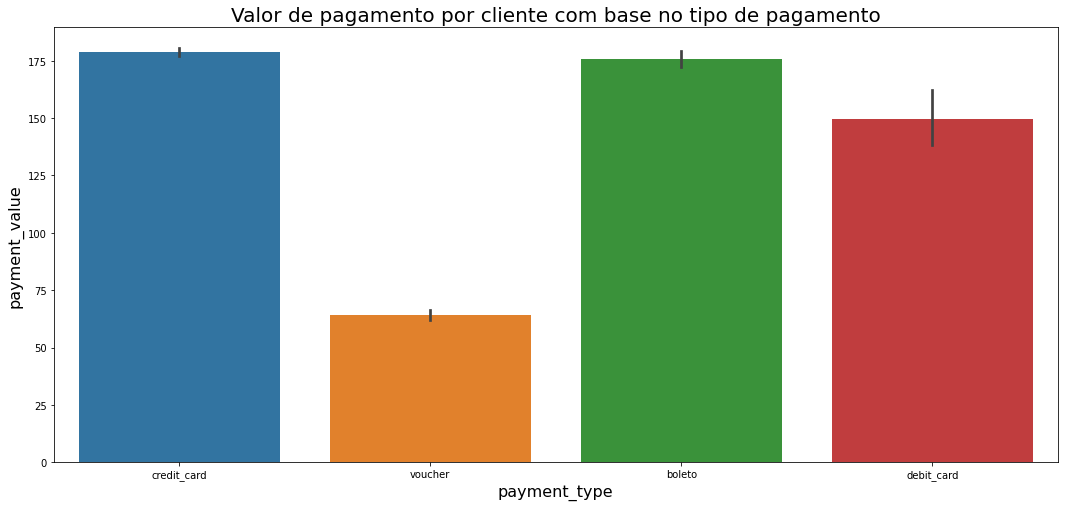

In [173]:
bar_plot_df('payment_type', 'payment_value', 'Valor de pagamento por cliente com base no tipo de pagamento')

**Insights sobre o negócio**


* Os cartões de crédito têm o maior valor de pagamento, seguidos pelo boleto, cartões de débito e vouchers.

## Avaliação do cliente com base no valor da transação

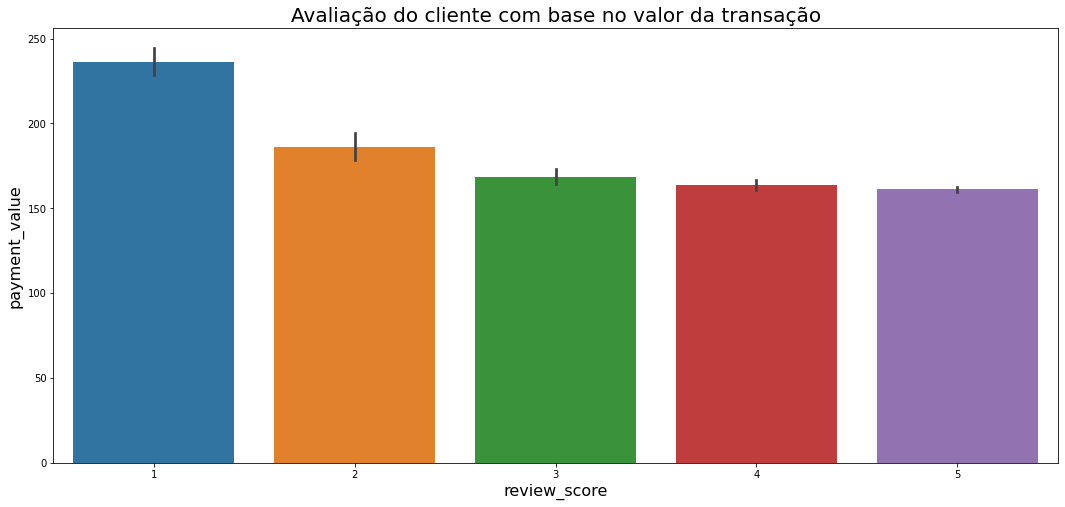

In [174]:
bar_plot_df('review_score', 'payment_value', 'Avaliação do cliente com base no valor da transação')

**Insights sobre o negócio**

* A avaliação aumenta um pouco à medida que o valor do pagamento diminui.

## Avaliação do cliente com base no valor de cada item

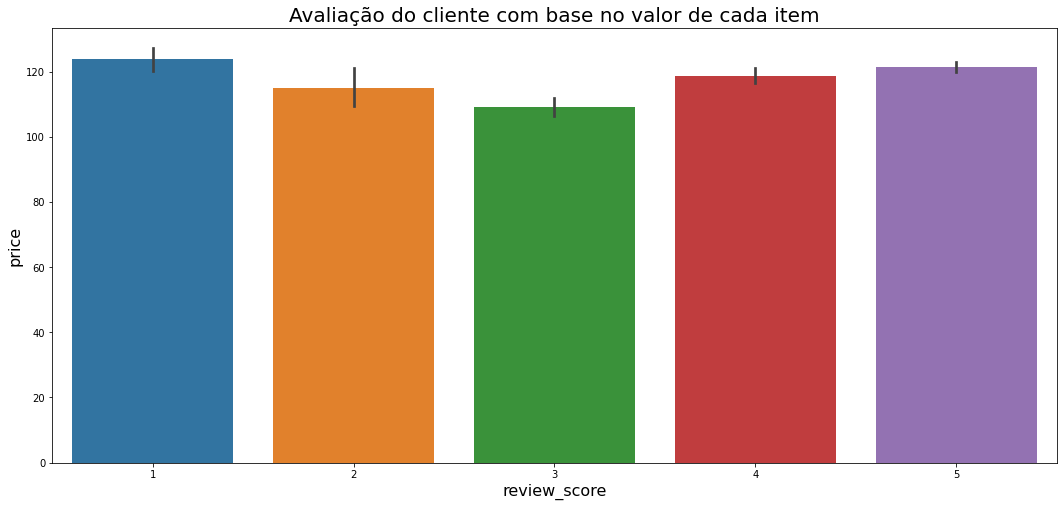

In [175]:
bar_plot_df('review_score', 'price', 'Avaliação do cliente com base no valor de cada item')

**Insights sobre o negócio**
* O valor do preço parece não ter efeito sobre a avaliação do consumidor.

## Avaliação do cliente com base no valor do frete

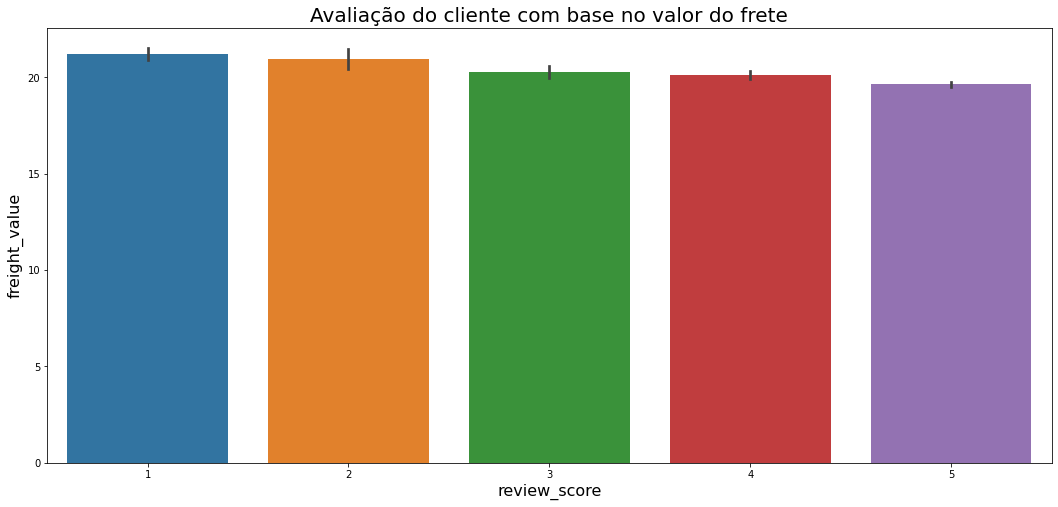

In [176]:
bar_plot_df('review_score', 'freight_value', 'Avaliação do cliente com base no valor do frete')

**Insights sobre o negócio**

* O cliente provavelmente dará uma melhor avaliação à medida que o valor do frete diminuir.

## Correlação entre o conjunto de dados

Vamos avaliar o quanto uma variável influencia na outra. Lembre que a corraleção positiva (em vermelho, valores próximos a 1) mostra que quando uma variável aumenta seu valor, a outra também aumenta. Enquanto que a correlação negativa mostra que enquanto uma variável aumenta seu valor, a outra diminui (em vermelho, valores próximos a -1).

Quando uma variável não possui correlação uma com a outra, o valor é 0, que são as cores mais fracas.

Aqui temos apenas uma correlação linear! Não conseguimos pegar outros comportamentos como correlações quadráticas e exponenciais.

Reparem nisso: Na diagonal temos uma correlação de 1, que é a variável contra ela mesma. O triângulo inferior é o espelho do triângulo superior.

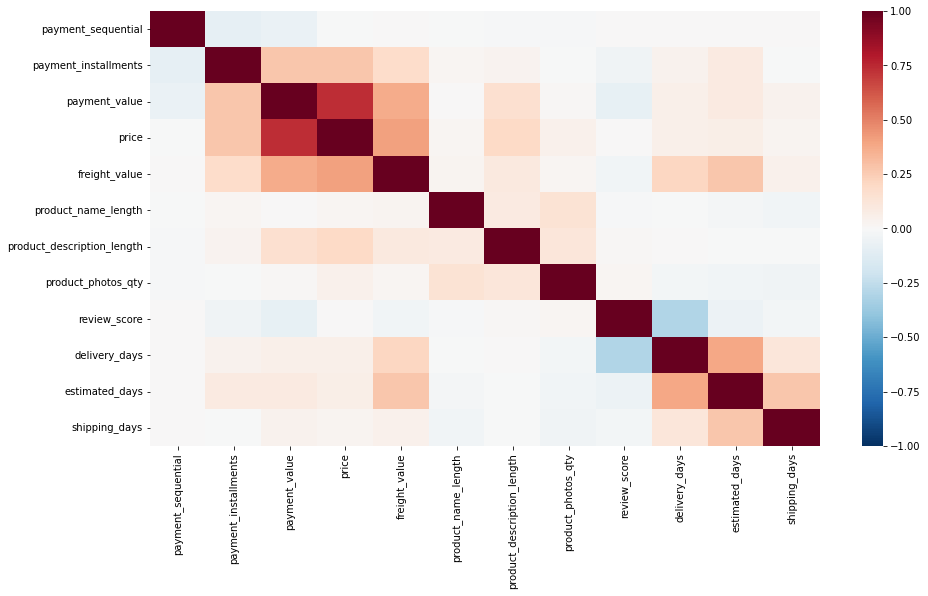

In [177]:
plt.figure(figsize=(15,8))
sns.heatmap(df_ecommerce.corr(),cmap="RdBu_r",vmin=-1, vmax=1)

Percebemos que:
* os dias para a entrega (delivery_days) possuem correlação postiva com os dias estimados para entrega (estimated_days)
* o valor do frete (freight_value) possui correlação positiva com os dias estimados (estimated_days). Faz sentido: quanto mais dias para entrega, maior o frete (mais distante)
* dias para entrega (delivery_days) possui uma correlação negativa com a avaliação do consumidor (review_score). Faz sentido: quanto mais tempo demora para o cliente receber o pedido, pior vai ser a sua avaliação.

## Correlação entre o valor da transação e o preço do produto

In [178]:
def scatter_plot_df(x_var, y_var, title):
  # definição do gráfico de barras
  fig = plt.figure(figsize = fig_size)

  sns.scatterplot(x=x_var, y=y_var, hue="review_score",
                data = df_ecommerce)

  # definição dos nomes dos eixos e título
  plt.xlabel(x_var, fontsize = font_size)
  plt.ylabel(y_var, fontsize = font_size)

  plt.title(title, fontsize = title_font_size)

  plt.show()

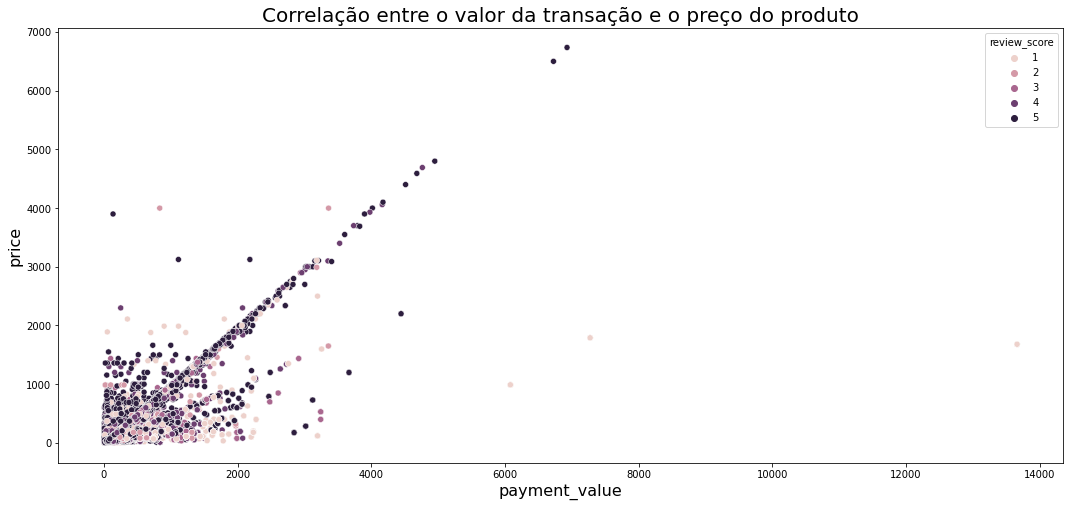

In [179]:
scatter_plot_df('payment_value', 'price', 'Correlação entre o valor da transação e o preço do produto')

**Insights de negócio**

* A maior parte da pontuação de boa avaliação de 4 e 5 ocorre quando o preço e o valor do pagamento têm o mesmo valor.


* A maior parte da pontuação de avaliação de 5 também aconteceu quando o valor do pagamento é inferior ao preço real dos produtos.

* A maior parte da pontuação de avaliação de 1 aconteceu quando o valor do pagamento é superior ao preço real dos produtos.

## Correlação entre a estimativa para entrega e dias para a entrega

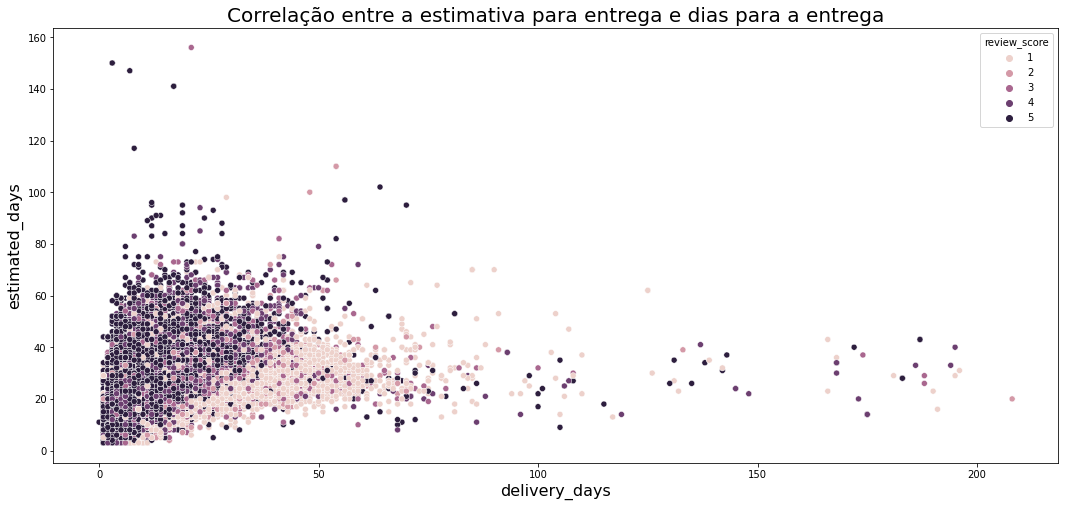

In [180]:
scatter_plot_df('delivery_days', 'estimated_days', 'Correlação entre a estimativa para entrega e dias para a entrega')

**Insights do negócio** 

* A maioria das avaliações 4 e 5 tem longos dias de estimativa de entrega, mas os dias reais de entrega do produto chegam antes ou no prazo, fazendo com que o produto chegue na mão do cliente mais rápido do que o tempo esperado.

* A maioria das avaliações negativas de 1 e 2 tem estimativa de dias entrega curtos, mas os dias de entrega reais do produto são mais longos do que o tempo esperado.

# Feature Engineering

Para tornar os dados mais precisos, o feature engineering é usada para criar novas features, como novas colunas e variáveis fictícias que fazem mais sentido para a criação do nosso modelo.

## Cria coluna se o produto chegou atrasado ou não

Vamos criar uma propriedade chamada arrival_time para saber se o produto chegou atrasado ou não.

In [181]:
df_ecommerce['arrival_time'] = (df_ecommerce['estimated_days'] - df_ecommerce['delivery_days'])

df_ecommerce['arrival_time'] = df_ecommerce.arrival_time.apply(lambda x: 0 if x < 0 else 1)

## Cria coluna com avaliação boa ou ruim

Criaremos uma coluna, considerando as avaliações de 1 a 5, se a avaliação é ruim (0) ou boa (1). A avaliação 3 vai ser descartada por ser neutra.

In [182]:
df_ecommerce.drop(df_ecommerce[df_ecommerce['review_score'] == 3].index, inplace=True)

df_ecommerce['review_score'] = df_ecommerce['review_score'].apply(lambda x: 0 if x < 3 else 1)

## Cria coluna numérica para o status do pedido

Por que precisamos de uma coluna numérica para o pedido? Não basta elas serem strings como entregue ou cancelado? Na verdade, alguns algoritmos não entendem variáveis categóricas (strings), por isso é melhor transformarmos em números (0 ou 1).

In [183]:
df_ecommerce['order_status'] = df_ecommerce['order_status'].replace(['canceled','delivered'],[0,1])

## Cria variável numérica para o tipo de pagamento

Nós temos mais de um tipo de pagamento: pode ser boleto, cartão de crédito, voucher, etc. Podemos criar 0, 1, 2? Na verdade, não. Isso seria uma regressão! O algoritmo entenderia que, por exemplo, o cartão de crédito (1) está mais próximo do boleto (0) do que o voucher (2), e isso não faz sentido nenhum. Melho usar as variáveis dummies nesse caso.

In [184]:
payment_type_dummies = pd.get_dummies(df_ecommerce['payment_type'])
df_ecommerce = df_ecommerce.join(payment_type_dummies)

## Remove colunas desnecessárias para o modelo de predição

In [185]:
df_ecommerce.drop(['payment_type','product_category'],axis=1,inplace=True)

df_ecommerce.head()

,order_status,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time,boleto,credit_card,debit_card,voucher
0,1,1,1,18.12,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,1,0,0
1,1,3,1,2.00,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
2,1,2,1,18.59,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
3,1,1,1,141.46,118.70,22.76,29.0,178.0,1.0,1,14,20,6,1,1,0,0,0
4,1,1,3,179.12,159.90,19.22,46.0,232.0,1.0,1,9,27,5,1,0,1,0,0


In [186]:
df_ecommerce[df_ecommerce['review_score'] == 1]

,order_status,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days,arrival_time,boleto,credit_card,debit_card,voucher
0,1,1,1,18.12,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,1,0,0
1,1,3,1,2.00,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
2,1,2,1,18.59,29.99,8.72,40.0,268.0,4.0,1,8,16,4,1,0,0,0,1
3,1,1,1,141.46,118.70,22.76,29.0,178.0,1.0,1,14,20,6,1,1,0,0,0
4,1,1,3,179.12,159.90,19.22,46.0,232.0,1.0,1,9,27,5,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115602,1,1,3,155.99,139.90,16.09,63.0,254.0,2.0,1,11,27,4,1,0,1,0,0
115603,1,1,3,85.08,72.00,13.08,50.0,1517.0,1.0,1,8,19,6,1,0,1,0,0
115604,1,1,3,195.00,174.90,20.10,52.0,828.0,4.0,1,22,24,6,1,0,1,0,0
115605,1,1,5,271.01,205.99,65.02,51.0,500.0,2.0,1,25,31,9,1,0,1,0,0


# Aprendizado de máquina (Machine Learning)

## Separação dos dados em teste e treino

Precisamos separar nossos dados em treino e teste. Por quê? Precisamos validar nossos modelo com dados que esse não tenha visto antes! Precisamos evitar que o modelo aprenda demais com os dados de treino e não seja representativo para os dados de teste.

In [187]:
y = df_ecommerce['review_score']
x = df_ecommerce.drop(['review_score'], axis = 1)

from sklearn.model_selection import train_test_split
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 206)

## Classificação utilizando florestas aleatórias



O resultado do nosso modelo é se a avaliação é boa ou ruim (classificação), considerando todas as variáveis de entrada que utilizamos até agora.

Nesse caso nós não normalizamos os dados! O algoritmo de árvores de decisão e florestas aleatórias não necessita desse tipo de processamento. Se você for utilizar outro tipo de modelo (regressão logística ou máquinas de vetores de suporte, por exemplo, você precisará normalizar os dados).

In [188]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=7, random_state=44)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Avaliação dos scores pra treino e teste

Vamos avaliar o quão bem o modelo conseguiu acertar suas predições para os dados de treino e teste.

In [189]:
print('RF treino score:',rf.score(X_train,y_train))
print('RF teste score:',rf.score(X_test,y_test))

RF treino score: 0.8704485170002412
RF teste score: 0.8651073064866168


## Avaliação de quais features são mais relevantes para o modelo

Quais são as variáveis que têm mais peso para o modelo? Ou seja, que variáveis influenciam mais? Observe que se a entrega atrasou e o tempo da entrega são extremamente significativos para decidir se a avaliação será positiva ou negativa. Faz sentido?

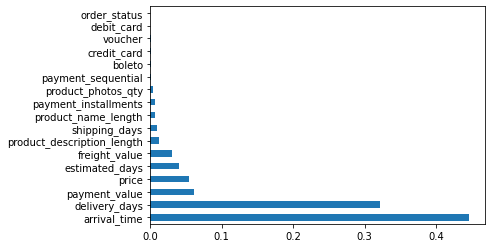

In [190]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

## Relatório da classificação utilizando florestas aleatórias

Já avaliamos a acurácia do modelo, agora vamos gerar um relatório de classificação. Viu alguma coisa estranha aí? Fica para a próxima aula...

In [191]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.24      0.37      3370
           1       0.87      0.99      0.92     17365

    accuracy                           0.87     20735
   macro avg       0.82      0.61      0.64     20735
weighted avg       0.85      0.87      0.83     20735



# Melhoria do modelo de Machine Learning

## Separação dos dados de treino e teste

Vamos utilizar apenas as variáveis que tiveram mais relevância na criação do modelo: 'arrival_time', 'delivery_days', 'payment_value', 'price', 'estimated_days', 'freight_value'

In [192]:
y = df_ecommerce['review_score']
x = df_ecommerce[['arrival_time', 'delivery_days', 'payment_value', 'price', 'estimated_days', 'freight_value']]


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 206)

## Criação da função para o modelo de Machine Learning

Para não ficar colando o tempo inteiro a criação do modelo em ML e toda a parte de avaliação, vamos encapsular tudo isso em uma função!

In [193]:
def modelo_rf(X_train, X_test, y_train, y_test):
  from sklearn.metrics import f1_score
  rf = RandomForestClassifier(max_depth=7, random_state=44)
  rf.fit(X_train, y_train)
  y_pred_rf = rf.predict(X_test)

  # score
  print('RF treino accuracy:', rf.score(X_train,y_train))
  print('RF teste accuracy:', rf.score(X_test,y_test))
  print('f1 score', f1_score(y_test, y_pred_rf, average='macro'))
  
  # classification report
  print('\n Relatório de classificação')
  print(classification_report(y_test, y_pred_rf))

  return rf

Agora nós só precisamos chamar a função modelo_rf para treinar o modelo e retornar todas as avaliações necessárias.

In [194]:
rf = modelo_rf(X_train, X_test, y_train, y_test)

RF treino accuracy: 0.8715577525922353
RF teste accuracy: 0.8661683144441765
f1 score 0.6492653734910152

 Relatório de classificação
              precision    recall  f1-score   support

           0       0.78      0.25      0.37      3370
           1       0.87      0.99      0.93     17365

    accuracy                           0.87     20735
   macro avg       0.83      0.62      0.65     20735
weighted avg       0.86      0.87      0.84     20735



A interpretação para o 0, ou seja, para as avaliaçõe ruins é:

* Precision: de todas as avaliações negativas que o modelo fez predição, 78% realmente eram negativas


* Recall: de todas as avaliações que realmente eram negativas, o modelo fez a predição correta de apenas 24%

Ou seja, o modelo aprendeu muito mais com as avaliações positivas!

A precisão é necessária para reduzir o número de falsos positivos e o recall é necessário para reduzir o número de falsos negativos. É por isso que usaremos a pontuação macro F1 como métrica.

## Balanceamento dos dados

Vimos que temos muito mais avaliações boas do que ruins. Precisamos balancear os dados. Ou seja, vamos balancear a quantidade de exemplos bons e ruins no treinamento do modelo utilizando o método SMOTE.

In [195]:
y_train.value_counts()

1    69605
0    13335
Name: review_score, dtype: int64

In [196]:
# reamostragem dos dados: balancear o tamanho dos exemplos bons e ruins no treinamento
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=14)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [197]:
y_train.value_counts()

1    69605
0    69605
Name: review_score, dtype: int64

In [198]:
rf = modelo_rf(X_train, X_test, y_train, y_test)

RF treino accuracy: 0.7186049852740464
RF teste accuracy: 0.8211719315167592
f1 score 0.6855629201171076

 Relatório de classificação
              precision    recall  f1-score   support

           0       0.45      0.51      0.48      3370
           1       0.90      0.88      0.89     17365

    accuracy                           0.82     20735
   macro avg       0.68      0.69      0.69     20735
weighted avg       0.83      0.82      0.82     20735



Quando falamos sobre classificação, é importante não olhar apenas para a acurácia, mas precisamos considerar os falsos negativos e positivos. Pra isso serve o f1 score.

## Escalonamento dos dados

- Se o modelo possui diferentes ordens de grandeza
Exemplo: idades entre 0-100 e salários de 0-milhares
- Alguns modelos podem não funcionar com propriedades com diferentes escalas
- Pode resultar em algumas propriedades tendo mais peso que outras

Esse pode não ser o caso aqui, pois temos apenas valores na ordem de 100, mas é interessante fazer o escalonamento dos dados.

(0.0, 500.0)

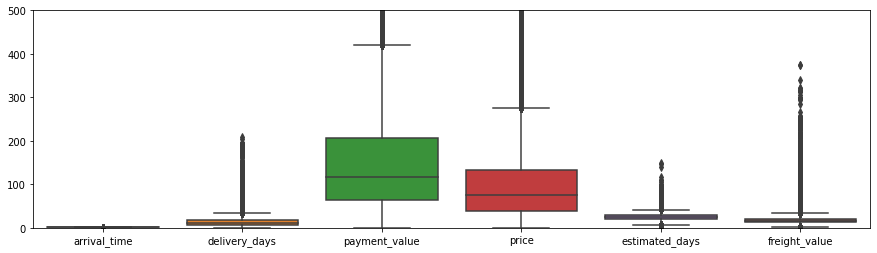

In [199]:
plt.figure(figsize=(15,4))
sns.boxplot(data=X_train)
plt.ylim([0, 500])

In [200]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_train.columns)

In [202]:
X_train_scaled

,arrival_time,delivery_days,payment_value,price,estimated_days,freight_value
0,1.0,0.052885,0.010548,0.018584,0.149660,0.048311
1,1.0,0.033654,0.034000,0.065198,0.115646,0.065764
2,1.0,0.028846,0.004686,0.007878,0.122449,0.026993
3,1.0,0.086538,0.007343,0.012495,0.210884,0.040903
4,1.0,0.043269,0.004032,0.005812,0.129252,0.040263
...,...,...,...,...,...,...
139205,1.0,0.024038,0.002747,0.001783,0.047619,0.003661
139206,1.0,0.105769,0.013182,0.023523,0.210884,0.055597
139207,0.0,0.139423,0.005550,0.007878,0.129252,0.058457
139208,1.0,0.043269,0.005923,0.010118,0.095238,0.031825


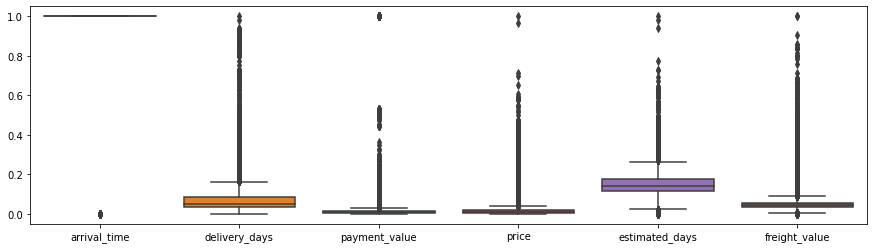

In [203]:
plt.figure(figsize=(15,4))
sns.boxplot(data=X_train_scaled)

In [204]:
rf = modelo_rf(X_train_scaled, X_test_scaled, y_train, y_test)

RF treino accuracy: 0.7186409022340349
RF teste accuracy: 0.8203038340969375
f1 score 0.684668289888228

 Relatório de classificação
              precision    recall  f1-score   support

           0       0.45      0.51      0.48      3370
           1       0.90      0.88      0.89     17365

    accuracy                           0.82     20735
   macro avg       0.68      0.69      0.68     20735
weighted avg       0.83      0.82      0.82     20735



Percebam que a diferença na acurácia não mudou muito com o escalonamento. Os algoritmos baseados em árvore são bastante insensíveis à escala das variáveis. Uma árvore de decisão está dividindo apenas um nó com base em um única variável. Essa divisão de variável não é influenciada por outras variáveis. Portanto, praticamente não há efeito das variáveis restantes na divisão. Isso é o que os torna invariáveis ao dimensionamento das variáveis.

## Teste de overfitting

max_depth é o que o nome sugere: a profundidade máxima que você permite que a árvore cresça. Quanto mais profundo você permitir, mais complexo seu modelo se tornará.

Para erro de treinamento, é fácil ver o que vai acontecer. Se você aumentar max_depth, o erro de treinamento sempre diminuirá (ou pelo menos não aumentará).

Para erros de teste, fica menos óbvio. Se você definir max_depth muito alto, a árvore de decisão pode simplesmente ajustar demais os dados de treinamento sem capturar padrões úteis como gostaríamos; isso fará com que o erro de teste aumente. Mas se você definir muito baixo, isso também não é bom; então você pode estar dando à árvore de decisão muito pouca flexibilidade para capturar os padrões e interações nos dados de treinamento. Isso também fará com que o erro de teste aumente.

Há um bom ponto ótimo entre os extremos de muito alto e muito baixo. Normalmente, o modelo consideraria o max_depth como um hiperparâmetro e usaria algum tipo de grid search com validação cruzada para encontrar um bom número para max_depth.

In [205]:
from sklearn.tree import DecisionTreeClassifier

rf = DecisionTreeClassifier(max_depth=100, random_state=44)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('RF treino score:',rf.score(X_train,y_train))
print('RF teste score:',rf.score(X_test,y_test))

RF treino score: 0.9977803318727103
RF teste score: 0.8073788280684833
